In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
time=np.arange(1,11)
group_1=0.01*np.exp(np.tile(time,(500,1)))+np.random.randn(500,len(time))*10
group_2=30*np.log(np.tile(time,(500,1)))+np.random.randn(500,len(time))*10
df1=pd.DataFrame(group_1,columns=time)
df2=pd.DataFrame(group_2,columns=time)
mean1=np.array([round(df1[i].mean(),2) for i in df1.columns])
mean2=np.array([round(df2[i].mean(),2) for i in df2.columns])

<ipython-input-164-4d3e600fc8f7>:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


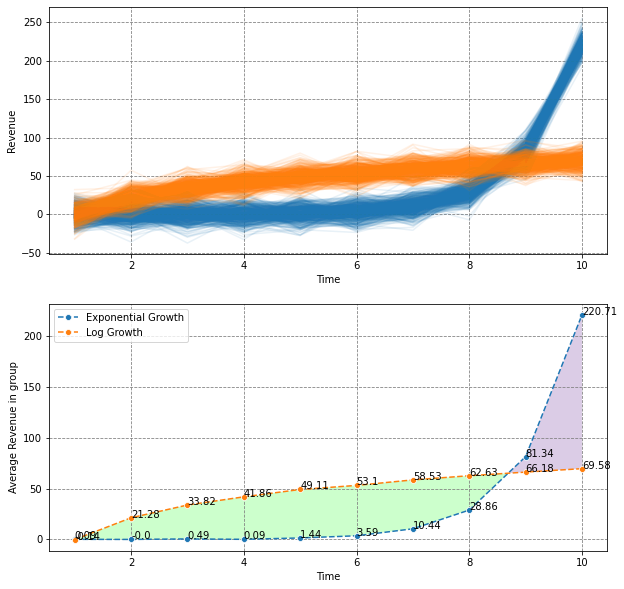

In [164]:
fig = plt.figure(figsize=(10, 10))
ax1=fig.add_subplot(211)
for i in range(len(df1[1])):
    sns.lineplot(x=time,y=df1.iloc[i],color='C0',alpha=0.1)
for i in range(len(df1[1])):
    sns.lineplot(x=time,y=df2.iloc[i],color='C1',alpha=0.1)
plt.grid(color='grey', ls='--')
ax1.set_xlabel('Time')
ax1.set_ylabel('Revenue')
ax2 = fig.add_subplot(212)
line_1 = sns.lineplot(x=time,
                      y=mean1,
                      color='C0',
                      marker='o',
                      ls='--',
                      label='Exponential Growth')
for i in range(len(time)):
    plt.annotate(mean1[i], (time[i], mean1[i]))
line_2 = sns.lineplot(x=time,
                      y=mean2,
                      color='C1',
                      marker='o',
                      ls='--',
                      label='Log Growth')
for i in range(len(time)):
    plt.annotate(mean2[i], (time[i], mean2[i]))
ax2.set_xlabel('Time')
ax2.set_ylabel('Average Revenue in group')
plt.fill_between(time,
                 mean1,
                 mean2,
                 where=mean1 <= mean2,
                 interpolate=True,
                 facecolor='lime',
                 alpha=0.2)
plt.fill_between(time,
                 mean1,
                 mean2,
                 mean1 > mean2,
                 facecolor='indigo',
                 interpolate=True,
                 alpha=0.2)
plt.grid(color='grey', ls='--')

fig.show()